# Question 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 4 input Truth Label :
input_features = np.array([[0,0,0,0],
                           [0,0,0,1],
                           [0,0,1,0],
                           [0,0,1,1],
                           [0,1,0,0],
                           [0,1,0,1],
                           [0,1,1,0],
                           [0,1,1,1],
                           [1,0,0,0],
                           [1,0,0,1],
                           [1,0,1,0],
                           [1,0,1,1],
                           [1,1,0,0],
                           [1,1,0,1],
                           [1,1,1,0],
                           [1,1,1,1]])

# Their correspoding outputs :
target_output = np.repeat(1,16).reshape(16,1)
target_output[0] = 0

In [3]:
print(f" Shape of Input Array: {input_features.shape}")

 Shape of Input Array: (16, 4)


In [4]:
print(f" Shape of Output Array: {target_output.shape}")

 Shape of Output Array: (16, 1)


In [5]:
class FeedForwardNN:
    def __init__(self):
        
        # Introducing predetermined bias terms :
        
        # Hidden Layers bias term :
        self.bias = np.array([6,3,2,5]).reshape(4,1) 
        # Output Layers bias term :
        self.bias2 = np.array([[1]])
        
        # Introducing predetermined weight terms :
        
        # Hidden Layers weight :
        self.W1 = np.array([[2,1,4,3],[0,-3,3,3],[-3,3,-2,1],[-2,6,1,-3]]).reshape(4,4)        
        # Output Layers weight :
        self.W2 = np.array([2,3,4,7]).reshape(4,1)
        
        # Output of output layer :
        self.A2 = None   
        
        # To track Mean Squared Error function :
        self.cost = []
        
        
    def step(self,X):
        """
        Given the arrays, return ; 
        if {1 , X > 0 
           {0 , X <= 0
        """
        return 1 * (X > 0)    
        
    def fit(self,X:np.ndarray,Y:np.ndarray) -> None: 
        """
        Given the traning dataset and their labels,
        fitting the model, and measure the performance
        by validating training dataset.
        """
        # Concatenating hidden layers weights and bias term :
        W1 = np.concatenate((self.W1,self.bias),axis = 1)
        
        # Feed Forwarding :
        Z1 = np.dot(X,W1) 
        
        # Output of the activation function : (0/1)
        A1 = self.step(Z1)
        
        # Same procedure for output layer :
        W2 = np.concatenate((self.W2,self.bias2))
        Z2 = np.dot(A1,W2) 
        self.A2 = self.step(Z2)
        
        # Error = Output of the output layer - Training label
        E = self.A2-Y
        
        # Mean Squared Error :
        MSE = (1/2) * np.abs(np.power(E,2).sum())
        self.cost.append(MSE)
                
    def evaluate(self,target_features):
        """
        Comparing the target labels by neural network's
        outputs, then returning accuracy score
        """
        acc = (self.A2 == target_features).all().mean()
        print(f"Accuracy of the model is: {int(acc*100)}%")
        return int(acc*100)  
    
    def predict(self,X):
        """
        Feed forwarding from the input nodes, through the hidden nodes 
        and to the output nodes.
        """
        return self.step(np.dot(self.step(np.dot(X,self.W1)),self.W2))  
    
    def display_results(self):
        """
        Plotting and displaying the Mean Sqaured Error
        
        """
        print(f"MSE loss is : {self.cost[-1]}")
        plt.plot(range(len(np.squeeze(np.array(self.cost)))),np.squeeze(np.array(self.cost)))
        plt.legend([f"MSE:{round(self.cost[-1],4)}"])
        plt.xlabel('# of Iterations')
        plt.ylabel('MSE Loss Function')
        plt.title('Model evaluation')        

   

In [6]:
model_partA = FeedForwardNN()
model_partA.fit(input_features,target_output)
model_partA.evaluate(target_output)

Accuracy of the model is: 100%


100

## Part C

In [7]:
class MultiLayerPerceptron:
    def __init__(self):        
         
        # Introducing weight and bias terms,
        # by standart normal distribution over 0
        
        np.random.seed(42)
        
        # Hidden Layers bias term :       
        self.B1 = np.random.randn(4,1)
        # Output Layers bias term :
        self.B2 = np.array([[1]])
        
        # Learning rate for gradient descent :
        self.lr = 0.05   
                        
        # Hidden Layers weight :
        self.W1 = np.random.randn(4,4) * 0.01
        # Output layers weight
        self.W2 = np.random.randn(4,1) * 0.01
        
        # To track Mean Squared Error function :
        self.cost = []
        
        # Concatenating weights and bias terms :
        self.W1 = np.concatenate((self.W1,self.B1),axis = 1)
        self.W2 = np.concatenate((self.W2,self.B2))
        
        # Output of the output layer
        self.A2 = None
        
    def sigmoid(self,X:np.ndarray):
        return 1/(1+np.exp(-X))
    
    def sigmoid_der(self,X:np.ndarray):
        """
        The derivative of Sigmoid function for
        gradient descent while backproparagation
        """
        return self.sigmoid(X)*(1-self.sigmoid(X))
    
    
    def fit(self,X:np.ndarray,Y:np.ndarray,iterations:int,verbose:True):
        """
        Given the traning dataset,their labels and number of epochs
        fitting the model, and measure the performance
        by validating training dataset.
        """                
         
        for epoch in range(iterations):
            
            # Feed forwarding :
            Z1 = np.dot(X,self.W1) 
            
            # Output of the hidden layer :
            A1 = self.sigmoid(Z1)
            
            # İnput of the output layer :
            Z2 = np.dot(A1,self.W2) 
            # Output of the output layer :
            self.A2 = self.sigmoid(Z2)
            
            # Calculating error
            E = self.A2-Y
            
            # Mean sqaured error :
            MSE = (1/2) * np.abs(np.power(E,2).sum())
            self.cost.append(MSE)
            
            if verbose == True:
                if epoch % 500 == 0:
                    print(f"The epoch num is: {epoch} ------> MSE is : {MSE}")
                    
            # Back propagation part, updating weights and bias term
            # according to the gradient descent algorithm, in the first phase
            # I computed effect of the outputs layers weights on the loss function.
            # Them, in the second phase, I computed the effect of the hidden layers
            # weight on the Error function. Finally, update the weights and biases.
            
#----------------------- First Phase ------------------------------------#
            # The derivative of the Error with respect to the output :
            dE_dA2 = E 
            # The derivative of output with respect to input to the output layer :
            dA2_dZ2 = self.sigmoid_der(Z2)
            dE_dZ2 = E * dA2_dZ2
            
            # The derivative of the input function of output layer with respect to weights of
            # the output layer :
            dZ2_dW2 = A1.T
            
            # Total derivate :
            dE_dW2 = np.dot(dZ2_dW2,dE_dZ2)
            
#----------------------- Second Phase ------------------------------------# 
            # Goal is to find the effect of the hidden layers weight 
            # on the output of neural network so we should find
        
            # The derivate of the Error function with respect to output of the hidden layer
            dE_dA1 = np.dot(dE_dZ2,self.W2.T)
            
            # The derivative of the outputs of the hidden layer with respect to input to the 
            # hidden layer :
            dA1_dZ1 = self.sigmoid_der(Z1)
            
            # Multiplication of above two :
            dE_dZ1= dE_dA1 * dA1_dZ1
            
            # The derivative of the input of the hidden layer with respect to the weights of
            # the hidden layer :
            dZ1_dW1 = X.T
            
            # Total derivative:
            dE_dW1 = np.dot(dZ1_dW1,dE_dZ1)
            
            # Updating weights and biases
            self.W1 -= self.lr * dE_dW1
            self.W2 -= self.lr * dE_dW2
            
                            
    def accuracy(self,Y):
        """
        Given the test labels of the training test, comparing and
        returning the accuracy of the model
        """
        acc = (self.A2 == target_features).all().mean()
        print(f"Accuracy of the model is: {int(acc*100)}%")
        return int(acc*100)
    
    def predict(self,X):
        """
        Feed forwarding from the input nodes, through the hidden nodes 
        and to the output nodes.
        """
        return self.sigmoid(np.dot(self.sigmoid(np.dot(X,self.W1)),self.W2))  
    
    def evaluate(self):  
        """Plotting and displaying the Mean Sqaured Error :        
        """
        print(f"MSE loss is : {self.cost[-1]}")
        plt.plot(range(len(np.squeeze(np.array(self.cost)))),np.squeeze(np.array(self.cost)))
        plt.legend([f"MSE:{round(self.cost[-1],4)}"])
        plt.xlabel('# of Iterations')
        plt.ylabel('MSE Loss Function')
        plt.title('Model evaluation') 
        

In [8]:
model_partC = MultiLayerPerceptron()
model_partC.fit(X = input_features,Y = target_output,iterations = 50000,verbose = True )

The epoch num is: 0 ------> MSE is : 0.9619788868874422
The epoch num is: 500 ------> MSE is : 0.40325494024751635
The epoch num is: 1000 ------> MSE is : 0.3795212467800225
The epoch num is: 1500 ------> MSE is : 0.35341330636682233
The epoch num is: 2000 ------> MSE is : 0.3132202597072006
The epoch num is: 2500 ------> MSE is : 0.22804025638377756
The epoch num is: 3000 ------> MSE is : 0.12364572046893026
The epoch num is: 3500 ------> MSE is : 0.06851007874362827
The epoch num is: 4000 ------> MSE is : 0.04303458148591599
The epoch num is: 4500 ------> MSE is : 0.02982426525555422
The epoch num is: 5000 ------> MSE is : 0.022157507630476345
The epoch num is: 5500 ------> MSE is : 0.017304044604442875
The epoch num is: 6000 ------> MSE is : 0.014021648979712172
The epoch num is: 6500 ------> MSE is : 0.01168555922122016
The epoch num is: 7000 ------> MSE is : 0.009954768413604405
The epoch num is: 7500 ------> MSE is : 0.008630360355893677
The epoch num is: 8000 ------> MSE is : 0.

MSE loss is : 0.0005240490481591191


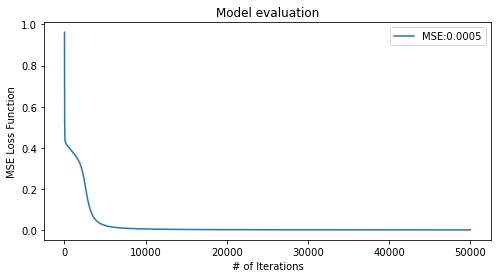

In [9]:
plt.figure(figsize = (8,4))
model_partC.evaluate()

In [10]:
print(f"Most Robust Weights of Hidden Layer \n {model_partC.W1}")

Most Robust Weights of Hidden Layer 
 [[-1.26240984 -1.46796279 -1.43157073 -1.60343491  2.90054917]
 [-1.26238999 -1.46804527 -1.44813112 -1.61921153  2.85520524]
 [-1.2505314  -1.46779474 -1.44178554 -1.5993274   2.9085472 ]
 [-1.24683938 -1.43399215 -1.41755183 -1.57873098  3.03688246]]


In [11]:
print(f"Most Robust Weights of Output Layer \n {model_partC.W2}")

Most Robust Weights of Output Layer 
 [[-3.32662012]
 [-3.86788154]
 [-3.79990092]
 [-4.26749739]
 [ 7.80405911]]


## Part D

In [12]:
# Creating 400 x 4 zero matrix :
input = np.zeros(1600).reshape(400,4)

# Generating 400 input sample = 16 x 25
for i in range(16):
    for j in range(25):
        input[i*25+j,:] = input_features[i]

# Noice matrix with Gaussion distribution zero mean 0.2 std.
noise = np.random.normal(loc = 0 , scale = 0.2 ,size = (400,4))

# Concetaneting
noisy_samples = input + noise

In [13]:
print(f" The shape of noisy samples: {noisy_samples.shape}")

 The shape of noisy samples: (400, 4)


In [14]:
# The predictions on the model created in the Part A :
model_A_pred = model_partA.predict(noisy_samples)

In [15]:
# # The predictions on the model created in the Part C :
model_C_pred = model_partC.predict(noisy_samples)

In [16]:
# Generating testing labels :
test_labels = np.repeat(1,400).reshape(400,1)
test_labels[:25] = 0

In [17]:
# Rounding the predictions of the model created
# in the Part C since sigmoid function returns the
# predictions in the interval [0,1]. 
model_C_pred = np.round(model_C_pred)

In [18]:
def performance(X1,X2):
    """
    Given two arrays, prediction matrix and
    test matrix, comparing and returning the number
    of true predictions
    """
    
    assert(X1.shape == X2.shape) 
    
    true_pred = 0
    
    for i in range(X1.shape[0]):
        if int(X1[i]) == 1*int(X2[i]):
            true_pred += 1
    return true_pred

In [19]:
model_A_perf = performance(model_A_pred,test_labels)
model_C_perf = performance(model_C_pred,test_labels)

In [20]:
print(f"The Accuracy of Model Part A is: {(model_A_perf/test_labels.shape[0]) * 100}% \n")
print(f"The Accuracy of Model Part C is: {(model_C_perf/test_labels.shape[0]) * 100}% ")

The Accuracy of Model Part A is: 94.0% 

The Accuracy of Model Part C is: 97.75% 
